In [1]:
%load_ext autoreload
%autoreload 2
import collections, numpy as np, pandas as pd, matplotlib, matplotlib.pyplot as plt, seaborn as sns
from af2genomics import *

In [2]:
df_struct = read_structures().merge(read_evidence(), how='left', left_on='uniprot_id', right_on='accession')\
    .query(' (100 <= n_resid) & (n_resid <= 500) & (mean_pLDDT > 70) & (resid_pdb != resid_pdb) & (resid_swiss != resid_swiss)')
df_scores = read_pockets().groupby('struct_id').agg(pocket_score_combined_scaled = ('pocket_score_combined_scaled', np.nanmax))
df_struct = df_struct.merge(df_scores, left_on='af2_id', right_on='struct_id', how='left').fillna({'pocket_score_combined_scaled': 0, 'catalytic_activity': False})
df_struct

,uniprot_id,af2_id,frag_id,n_frags,pdb,af2_pdb,n_resid,mean_pLDDT,seq,resid_pdb,...,entrez_id,isin_CRISPRInferredCommonEssentials,isin_AchillesCommonEssentialControls,isin_AchillesNonessentialControls,accession,gene_name_primary,catalytic_activity,active_site,binding_site,pocket_score_combined_scaled
0,A0A075B6H5,A0A075B6H5-F1,F1,1,resources/afdb/pdb/A0/A0/75/A0A075B6H5-F1.pdb.gz,results/23.04_bindfunc/af2/A0/A0/75/A0A075B6H5...,130,85.97,METVVTTLPREGGVGPSRKMLLLLLLLGPGSGLSAVVSQHPSRVIC...,NaN,...,NaN,False,False,False,NaN,NaN,False,NaN,NaN,926.757593
1,A0A087X1L8,A0A087X1L8-F1,F1,1,resources/afdb/pdb/A0/A0/87/A0A087X1L8-F1.pdb.gz,results/23.04_bindfunc/af2/A0/A0/87/A0A087X1L8...,192,74.17,MRLGSPGLLFLLFSSLRAANFSVPVVSAPHSPSQDELTFTCTSING...,NaN,...,NaN,False,False,False,NaN,NaN,False,NaN,NaN,824.839190
2,A0A096LPH7,A0A096LPH7-F1,F1,1,resources/afdb/pdb/A0/A0/96/A0A096LPH7-F1.pdb.gz,results/23.04_bindfunc/af2/A0/A0/96/A0A096LPH7...,203,80.80,TLYNVKAEIFPPSGMEYCRTGSLCSLEVLITRLSDLLEVDKDEALT...,NaN,...,NaN,False,False,False,NaN,NaN,False,NaN,NaN,931.292079
3,A0A096LPK6,A0A096LPK6-F1,F1,1,resources/afdb/pdb/A0/A0/96/A0A096LPK6-F1.pdb.gz,results/23.04_bindfunc/af2/A0/A0/96/A0A096LPK6...,155,90.63,VEEWGPFDLVYGATPPLGHTCDRPPSWYLFQFHRLLQYARPKPGSP...,NaN,...,NaN,False,False,False,NaN,NaN,False,NaN,NaN,918.807856
4,A0A0G2JLG4,A0A0G2JLG4-F1,F1,1,resources/afdb/pdb/A0/A0/G2/A0A0G2JLG4-F1.pdb.gz,results/23.04_bindfunc/af2/A0/A0/G2/A0A0G2JLG4...,411,87.06,MEQTEKSKVYAENGLLEKIKLCLSKKPLPSPTERKKFDHDFAISTS...,NaN,...,NaN,False,False,False,NaN,NaN,False,NaN,NaN,993.291584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,Q9Y664,Q9Y664-F1,F1,1,resources/afdb/pdb/Q9/Y6/64/Q9Y664-F1.pdb.gz,results/23.04_bindfunc/af2/Q9/Y6/64/Q9Y664-F1.pdb,436,88.41,MMGEAAVAAGPCPLREDSFTRFSSQSNVYGLAGGAGGRGELLAATL...,NaN,...,11133.0,False,False,False,Q9Y664,KPTN,False,NaN,NaN,983.081861
771,Q9Y6E2,Q9Y6E2-F1,F1,1,resources/afdb/pdb/Q9/Y6/E2/Q9Y6E2-F1.pdb.gz,results/23.04_bindfunc/af2/Q9/Y6/E2/Q9Y6E2-F1.pdb,419,91.33,MNKHQKPVLTGQRFKTRKRDEKEKFEPTVFRDTLVQGLNEAGDDLE...,NaN,...,28969.0,False,False,False,Q9Y6E2,BZW2,False,NaN,NaN,863.510744
772,Q9Y6H3,Q9Y6H3-F1,F1,1,resources/afdb/pdb/Q9/Y6/H3/Q9Y6H3-F1.pdb.gz,results/23.04_bindfunc/af2/Q9/Y6/H3/Q9Y6H3-F1.pdb,246,80.89,MAGAPDERRRGPAAGEQLQQQHVSCQVFPERLAQGNPQQGFFSSFF...,NaN,...,91419.0,True,False,False,Q9Y6H3,ATP23,False,True,True,984.704989
773,Q9Y6I8,Q9Y6I8-F1,F1,1,resources/afdb/pdb/Q9/Y6/I8/Q9Y6I8-F1.pdb.gz,results/23.04_bindfunc/af2/Q9/Y6/I8/Q9Y6I8-F1.pdb,212,91.97,MAAPPQLRALLVVVNALLRKRRYHAALAVLKGFRNGAVYGAKIRAP...,NaN,...,11264.0,False,False,False,Q9Y6I8,PXMP4,False,NaN,NaN,939.799915


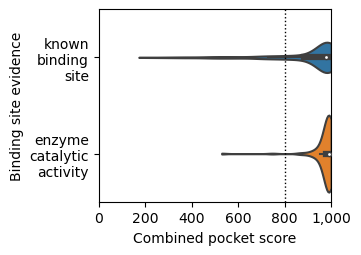

In [3]:
data_ = pd.concat([
    read_pockets().query('pocket_is_ubs')['pocket_score_combined_scaled'].to_frame().assign(label='known\nbinding\nsite'),
    df_struct.query('catalytic_activity')['pocket_score_combined_scaled'].to_frame().assign(label='enzyme\ncatalytic\nactivity'),
])
plt.figure(figsize=(3, 2.5))
sns.violinplot(data_, x='pocket_score_combined_scaled', y='label', orient='h', cut=0)
plt.axvline(800, color='k', linewidth=1, linestyle='dotted')
plt.gca().xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.gca().set_xlabel('Combined pocket score')
plt.gca().set_ylabel('Binding site evidence')
plt.gca().set_xlim(0, 1000)
plt.savefig('pocket_score_at_pos_controls.svg', bbox_inches='tight', transparent=True)

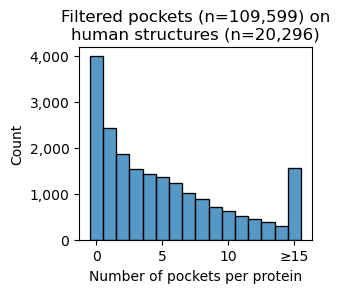

In [4]:
n_struct_ = len(read_structures().query('n_frags == 1'))
n_pockets_ = len(read_pockets().query('pocket_score_combined_scaled > 800'))

data_ = read_structures().query('n_frags == 1').merge(
    read_pockets().query('pocket_score_combined_scaled > 800').groupby('struct_id').size().to_frame('struct_n_pockets'),
    left_on='af2_id',
    right_index=True,
    how='left',
)[['af2_id', 'struct_n_pockets']].fillna({'struct_n_pockets': 0}).astype({'struct_n_pockets': int})
max_ = 15
data_['struct_n_pockets_capped'] = data_['struct_n_pockets'].map(lambda x: int(min(x, max_)))
plt.figure(figsize=(3, 2.5))
sns.histplot(data_, x='struct_n_pockets_capped', discrete=True)
plt.gca().set_title(f'Filtered pockets (n={uf(n_pockets_)}) on\nhuman structures (n={uf(n_struct_)})')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda val, pos: f'{int(val):,}'))
plt.gca().set_xticks([0, 5, 10, 15])
plt.gca().set_xticklabels(['0', '5', '10', '≥15'])
plt.gca().set_xlabel('Number of pockets per protein')
plt.gca().set_ylabel('Count')
plt.savefig('n_pockets_per_protein.svg', bbox_inches='tight', transparent=True)

In [5]:
df_swiss_coverage = pd.read_csv(workpath('23.10.16_af2_human_pockets/af2.obabel_hxr.autosite.summary.combined_score.swiss_coverage.tsv'), sep='\t')
phead(df_swiss_coverage)

547,401 records


,0,1,2
struct_id,A0A024R1R8-F1,A0A024R1R8-F1,A0A024RBG1-F1
pocket_id,1,2,1
pocket_energy,50.329,37.488,244.37
pocket_n_points,159.0,108.0,561.0
pocket_rad_gyration,4.042788,3.175737,7.310256
pocket_energy_per_vol,0.316535,0.347111,0.435597
pocket_buriedness,0.772959,0.808219,0.856184
pocket_score,23.497914,22.21455,56.255444
pocket_cl_file,results/23.04_bindfunc/af2.obabel_hxr.autosite...,results/23.04_bindfunc/af2.obabel_hxr.autosite...,results/23.04_bindfunc/af2.obabel_hxr.autosite...
pocket_cl_isfile,True,True,True


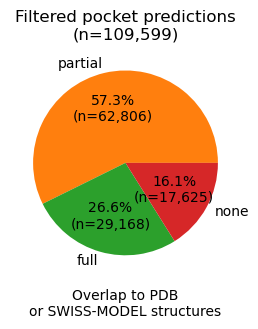

In [6]:
data_pockets_ = df_swiss_coverage.query('pocket_score_combined_scaled > 800')
data_ = data_pockets_['pocket_resid_swissmodel_coverage'].value_counts()

plt.figure(figsize=(3, 3))
plt.title(f'Filtered pocket predictions\n(n={uf(len(data_pockets_))})')
def autopct_format(values):
    #https://stackoverflow.com/questions/73616867/pie-chart-from-count-of-values-showing-the-percentage
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n(n={uf(val)})'
    return my_format

plt.pie(data_, labels=data_.index, autopct=autopct_format(data_), colors=['tab:orange', 'tab:green', 'tab:red'])
plt.gca().set_ylabel('');
plt.gca().set_xlabel('Overlap to PDB\nor SWISS-MODEL structures')
plt.savefig('pocket_coverage_pdb_swiss.svg', bbox_inches='tight', transparent=True)